In [1]:
%run data_getter_and_processor.ipynb

import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


# Obtain Training and testing data.
train_x, test_x, train_y, test_y = get_split_train_data(random_state=10)

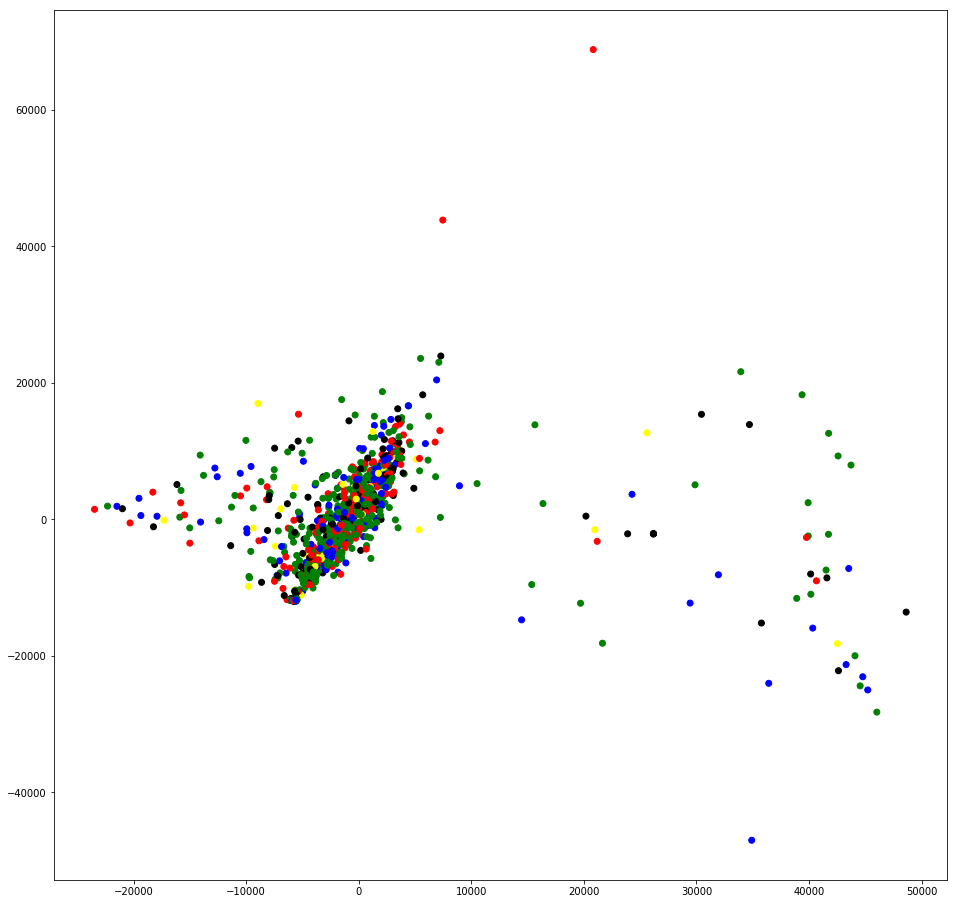

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Apply gridSearch to search best Random Forest model for imbalanced data for worst
worst_stress_levels = train_y.loc[:,"worst_stress_level"]
balanced_train_x = train_x
# balanced_train_x, worst_stress_levels = balance_data(train_x, worst_stress_levels) 
# balanced_train_x = scale(balanced_train_x)

model = PCA(n_components=3)
reduced_train_x = model.fit_transform(balanced_train_x)


# plot the figure

plt.figure(figsize=(16,16))

x = reduced_train_x[:,0]
y =  reduced_train_x[:,1]
z =  reduced_train_x[:,2]

colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'yellow'}

df = pd.DataFrame({'x':x, 'y':y, 'label':worst_stress_levels})
plt.scatter(df['x'], df['y'], c=df['label'].apply(lambda x: colors[x]))
plt.show()

In [73]:
# 3d interactive plot using plotly

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
scale_x = 2
scale_y = 2
scale_z = 2

df = pd.DataFrame({'x':x, 'y':y, 'z':z,'label':worst_stress_levels})

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np

traces = []

for label in df.label.unique():
    sub_df = df[df.loc[:, 'label']==label]
    trace = go.Scatter3d(
    x= sub_df['x'],
    y= sub_df['y'],
    z= sub_df['z'],
    text = sub_df['label'], 
    mode='markers',
    name="Class " + str(label),
    marker=dict(
        size=12,
        color=colors[label],  # set color to an array/list of desired values
        colorscale=None,   # choose a colorscale
        opacity=0.8
    ))
    traces.append(trace)


data = traces
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
plotly.offline.plot({
    "data": data,
    "layout": layout
})


'file://F:\\Projects\\STRAIN-MachineLearning\\notebooks\\temp-plot.html'